# Eliiza Hamlet Challenge

# Script pre_processing

In [1]:
# read the target file as a stirng list
FileName = ("hamlet.txt")
data = open(FileName).readlines()

# Challenge I: Show the number of lines said per character throughout the play.

- Step I-1: extract all the characters in Hamlet

In [2]:
# locate the character introduction area in the script, from character_start_line to character_end_line
for i in range(len(data)):
    if data[i].find('DRAMATIS PERSONAE')!=-1:
       character_start_line = i

for j in range(len(data)):
    if data[j].find('SCENE	Denmark.')!=-1:
       character_end_line = j

# character is the list to store all characters. 
import re
character = [] 
pattern = r'(.*:)'
for k in range(character_start_line+1,character_end_line):
    if re.match(pattern,data[k]):
        i = data[k].index('(')
        j = data[k].index(':')
        character.append(data[k][i+1:j])
    else:
        if data[k].find('\t')!=-1 and data[k][0].isalpha():
            character.append(data[k].split('\t')[0])
print(character)

['KING CLAUDIUS', 'HAMLET', 'LORD POLONIUS', 'HORATIO', 'LAERTES', 'LUCIANUS', 'VOLTIMAND', 'CORNELIUS', 'ROSENCRANTZ', 'GUILDENSTERN', 'OSRIC', 'Gentlemen', 'First Priest', 'MARCELLUS', 'BERNARDO', 'FRANCISCO', 'REYNALDO', 'First Player', 'Player King', 'Player Queen', 'First Clown', 'Second Clown', 'PRINCE FORTINBRAS', 'First Ambassador', 'GERTRUDE', 'QUEEN GERTRUDE', 'OPHELIA', 'Lord', 'First Sailor', 'Messenger', 'Ghost']


In [3]:
# three self-defined functions for a speech of a character. 
# the defintion of a speech can be found in ppt.
def is_a_speech(s):
    '''If the string s is a speech of a character, return ture; otherwise false'''
    char = s.split('\t')[0]
    if char in character:
        return True
    else:
        return False

def is_a_speech_of_char(char,s):
    '''If the string s is a speech of the character char, return ture; otherwise false'''
    temp = s.split('\t')[0]
    if char == temp:
        return True
    else:
        return False

def is_a_speech_of_neg_char(char,s):
    '''If the string s is a speech from the character char rather than others, return ture; otherwise false'''
    if is_a_speech(s) and (not is_a_speech_of_char(char,s)):
        return True
    else:
        return False

In [4]:
# two self-defined functions for a line of a charcter. 
# the defintion of a line of a character can be found in ppt.
def is_a_line_of_char(char, s):
    '''If the string s is a line from the character char, return ture; otherwise false'''
    condition_1 = s.startswith(char) and s.find('[')==-1
    condition_2 = bool(re.match(r'	[A-Z].*',s))
    if (condition_1 or condition_2) and (not s.startswith('	HAMLET')):
        return True
    else:
        return False
    

def lines_of_char(char): # idea is show in ppt
    '''return how many lines the character char said in the whole script'''
    start_speech_index = 0
    end_speech_index = 0
    temp = 0
    freq = 0
    speech = []
    
    #check from the start of the speech to the end from the whole script
    for k in range(character_end_line+1,len(data)):
        if is_a_speech_of_char(char, data[k]):
            start_speech_index = k
            temp = start_speech_index + 1
            while True:
                if is_a_speech_of_neg_char(char, data[temp]) or temp==len(data)-1:
                    end_speech_index = temp-1
                    break
                else:
                    temp = temp + 1
            for i in range(start_speech_index,end_speech_index+1):
                speech.append(data[i])
    for i in range(len(speech)):
        if is_a_line_of_char(char, speech[i]):
            freq = freq + 1
    return freq

In [5]:
# other helpful self-defined funtions
def dic_sort(x):
    '''rank a dictionary x by its value, descending'''
    sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
    d_sorted = dict(sorted_x)
    return d_sorted

- Step I-2: calculuate the number of lines of each character and store them the dictionary char_line_dic. In the key-value pair, the key is the name of the characther and the value is the number of lines.

In [6]:
# calculate lines of for all characters
char_line_dict = {}
for i in character:
    char_line_dict[i] = lines_of_char(i)

- Step I-3: show the result:  <br />
1) print them out by descending order  <br />
2) show as a barchart

In [7]:
import matplotlib.pyplot as plt

D= char_line_dict
D = dic_sort(D)
for i in D:
    print(i,D[i])

HAMLET 923
KING CLAUDIUS 510
LORD POLONIUS 312
HORATIO 213
QUEEN GERTRUDE 159
LAERTES 157
OPHELIA 154
Ghost 90
ROSENCRANTZ 70
MARCELLUS 67
First Player 49
Player King 44
GUILDENSTERN 43
BERNARDO 38
Player Queen 30
First Clown 23
VOLTIMAND 22
REYNALDO 14
Second Clown 14
FRANCISCO 10
PRINCE FORTINBRAS 9
LUCIANUS 6
Messenger 5
First Sailor 2
CORNELIUS 1
OSRIC 0
Gentlemen 0
First Priest 0
First Ambassador 0
GERTRUDE 0
Lord 0


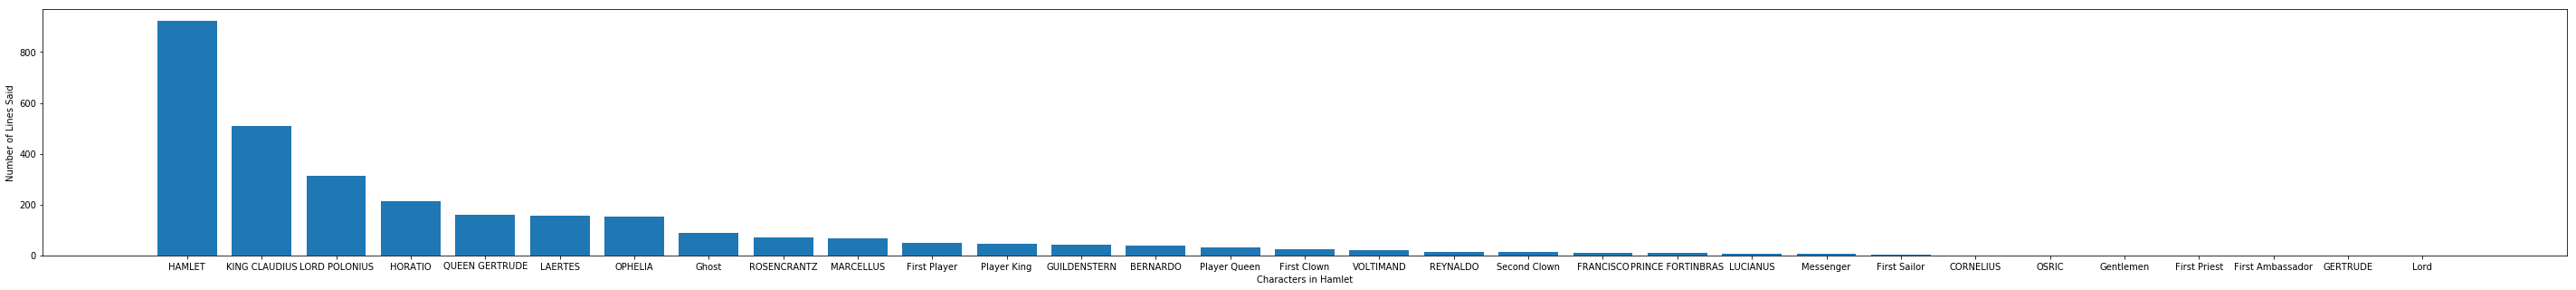

In [18]:
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.rcParams['figure.figsize'] = [50, 5]
plt.ylabel('Number of Lines Said')
plt.xlabel('Characters in Hamlet')
plt.show() # please double click to enlarge the plot

# Challenge II Make a word cloud of unusual words in the script

- Step II-1: build dictionary of Hamlet

In [9]:
# my_dict is used to store the words and its occurrence in Hamlet.
my_dict = {}
for i in range(len(data)):
    temp = re.compile('\w+').findall(data[i])
    for key in temp:
        key = key.lower()
        if key in my_dict:
            my_dict[key] += 1
        else:
            my_dict[key] = 1


- Step II-2: extract unusuall words

In [10]:
unusual_word_dic = {}
count = 0
unusual_thershold = 8
for i in my_dict:
        if my_dict[i]<unusual_thershold and count<100:
            unusual_word_dic[i]=my_dict[i]
            count = count+1

Step II-3: build word cloud for the unusual words.

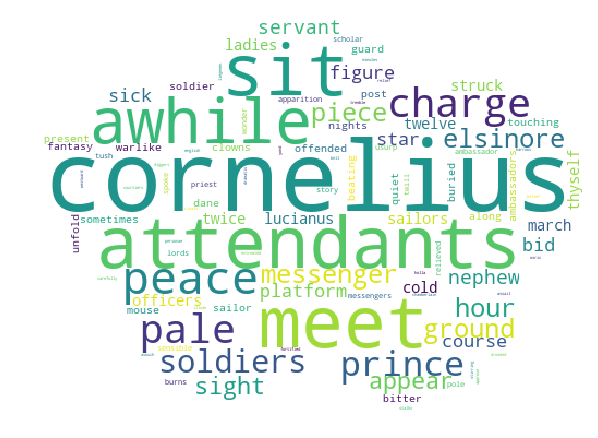

In [11]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from os import path, getcwd

wc = WordCloud(background_color="white",width=2000,height=2000, max_font_size=160, max_words=100,relative_scaling=1,normalize_plurals=False,mask = np.array(Image.open("mask-cloud1.png"))).generate_from_frequencies(unusual_word_dic)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc)

Explanation of the above word cloud: the bigger the word font is, the more frequent the word appears in Hamlet script. For example: 'cornelius': 7; 'soldiers': 6, 'along': 3.

Similarily, I made an usual word cloud as I am curious about which words are often said in Hamlet.

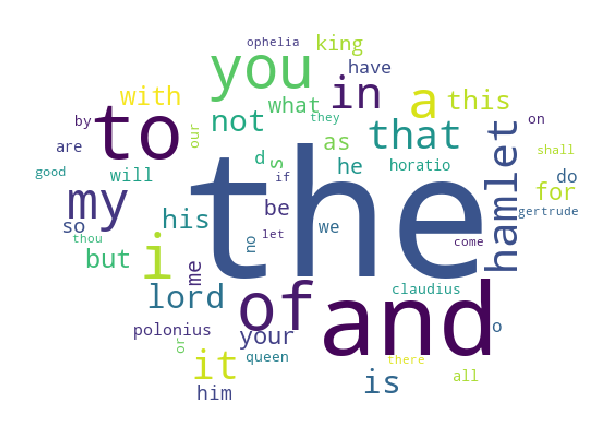

In [12]:
usual_word_dic = {}            
count = 0
for i in my_dict:
        if my_dict[i]>80 and count<100:
            usual_word_dic[i]=my_dict[i]
            count = count+1
wc = WordCloud(background_color="white",width=2000,height=2000, max_font_size=160, max_words=100,relative_scaling=1,normalize_plurals=False,mask = np.array(Image.open("mask-cloud1.png"))).generate_from_frequencies(usual_word_dic)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc)

findings and possible extension:
- the most frequent words are 'the', 'and', 'of' and so on, which are stop words can be filter out.
- different word forms such as had, have, has can be treated has one word - have. Thus, steming is an potiential apporach.
- 'hamlet' shows in the above word cloud which makes sense as the whole drama is all about Hamlet.

# Challenge III Compute the sentiment score for each scene.

- Step III-1: import NLTK package and initialize VADER

In [13]:
import nltk
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

- Step III-2: locate the start position of each scene.

In [14]:
# scene_index_list stores the start location of each scene.
scene_index_list = []
for i in range(len(data)):
    if data[i].startswith('ACT '): #In the script, each scene is started by its ACT name
            scene_index_list.append(i) 
scene_index_list.append(len(data))

- Step III-3: define the function of sentiment score calculation with the help of VADER

In [15]:
def sentiment_score(start, end):
    content = ''
    for i in range(start,end):
        content = content + data[i]
    scores = sid.polarity_scores(content)
    print("sentiment score:",scores['compound'])
    return scores['compound']

- Step III-4 calculate and show results

In [16]:
sen_score = []
for i in range(len(scene_index_list)-1):
    print(data[scene_index_list[i]])
    print(data[scene_index_list[i]+4])
    temp = sentiment_score(scene_index_list[i],scene_index_list[i+1])
    sen_score.append(temp)
    print('\n------------------------------------')

ACT I

SCENE I	Elsinore. A platform before the castle.

sentiment score: 0.9629

------------------------------------
ACT I

SCENE II	A room of state in the castle.

sentiment score: 0.9987

------------------------------------
ACT I

SCENE III	A room in Polonius' house.

sentiment score: 0.9993

------------------------------------
ACT I

SCENE IV	The platform.

sentiment score: -0.9951

------------------------------------
ACT I

SCENE V	Another part of the platform.

sentiment score: 0.9909

------------------------------------
ACT II

SCENE I	A room in POLONIUS' house.

sentiment score: 0.9545

------------------------------------
ACT II

SCENE II	A room in the castle.

sentiment score: 0.9997

------------------------------------
ACT III

SCENE I	A room in the castle.

sentiment score: 0.9996

------------------------------------
ACT III

SCENE II	A hall in the castle.

sentiment score: 0.9993

------------------------------------
ACT III

SCENE III	A room in the castle.

sentimen

Result anlayses:

In [17]:
print(sorted(sen_score))

[-0.9951, -0.4569, 0.5171, 0.5605, 0.78, 0.9406, 0.9545, 0.9629, 0.9684, 0.9815, 0.9909, 0.992, 0.9934, 0.9987, 0.9988, 0.9993, 0.9993, 0.9996, 0.9997]


- Only one scene is extremly negative
- three ones are nurture
- All the others are extremely positive